# **Edge Detection**
1. Intensity Edge
2. 
3. Texture Edge

In [2]:
#import Libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

#import utilities
import image_utils as utils


## **What is edge detection?**

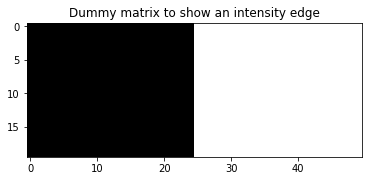

In [3]:
#create dummy matrix and show it as an image

mat=np.zeros((20,50))
mat[:,25:] = 1

plt.imshow(mat, cmap = 'gray')
plt.title('Dummy matrix to show an intensity edge')
plt.show()

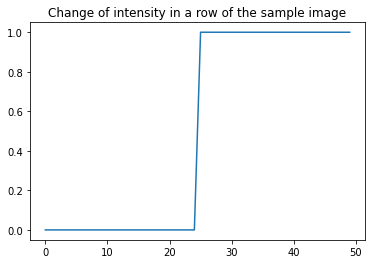

In [4]:
# Plot the intensity levels of a single row

plt.plot(mat[1, :])
plt.title('Change of intensity in a row of the sample image')
plt.show()

## **Simple edge detection**
- Edge is detected by derivative approach.
- by getting the change in intensity we can find the edges which is done by first order derivative filters

In [5]:
from numpy import diff

In [6]:
dx = 2
mat_prime = diff(mat[1, :])/dx

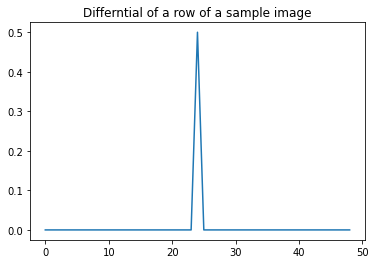

In [7]:
plt.plot(mat_prime)
plt.title('Differntial of a row of a sample image')
plt.show()

### 1D-filter [-1, 1]

In [8]:
vec = mat[1, :]
kernel = [-1,1]
new_vec = []
# print(len(vec))
# print(len(kernel))
for i in range(len(vec) - len(kernel) + 1):
    # print(vec[i], vec[i+20])
    op = vec[i] * kernel[0] + vec[i+1] * kernel[1]
    new_vec.append(op)

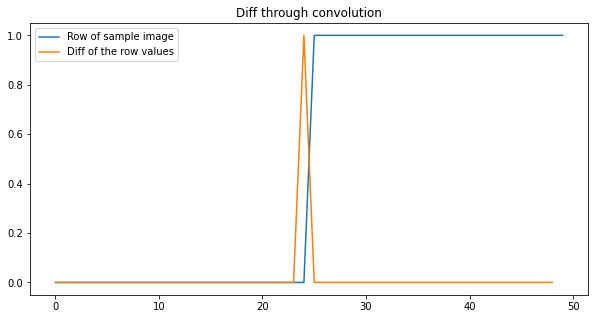

In [9]:
# Plot
f, ax = plt.subplots(1, 1, figsize = (10,5))
# print(f, ax)
plt.plot(vec, label = 'Row of sample image')
plt.plot(new_vec, label = 'Diff of the row values')
plt.legend()
plt.title('Diff through convolution')
plt.show()

### Roberts operator
- also known as the cross gradient operator
- uses 2*2 kernel or mask 
- works on diagnol pixels or elements

In [10]:
import cv2

In [11]:
#Apple filter2D operation

kernel  = np.array([[0, 1], [-1, 0]])
print(kernel)

[[ 0  1]
 [-1  0]]


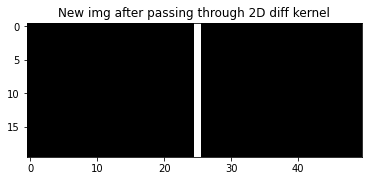

In [12]:
new_img = cv2.filter2D(mat, -1, kernel)  #-1 means to keep the input and output image size same

plt.imshow(new_img, cmap= 'gray')
plt.title('New img after passing through 2D diff kernel')
plt.show()

### **Advanced kernels for edge detection**

1. Prewitt operator
- uses 3*3 kernels to perform the operation
- for detecting the vertical and horizantal edges
2. Sobel operator
- uses 3*3 kernels to perform the operation
- masks place the more emphasis on the pixels which are close to the centre of 
the mask 
Check for doc

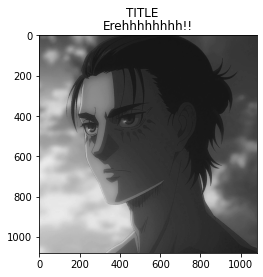

In [13]:
# read a sample image

#img = cv2.imread('iron-man.jpg')                                       #Importing image
img = cv2.cvtColor(cv2.imread('eren.jpg'), cv2.COLOR_BGR2RGB)        #Import Image and converting color
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                                  #Convert image to black and white


# utils.showImage([img], ['Eda Korangaaa'])
utils.showImage([img_bw], ['Erehhhhhhhh!!'], 'TITLE', scale=True)

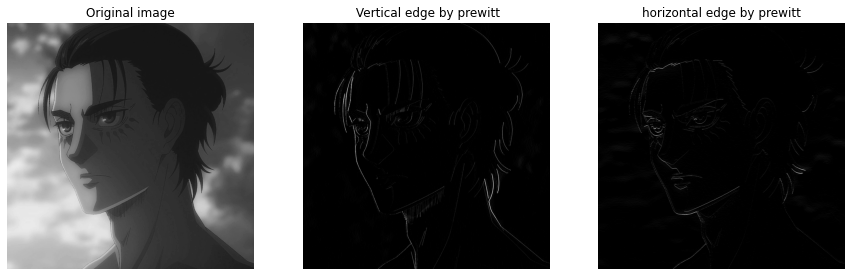

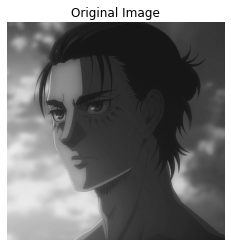

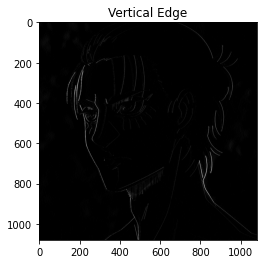

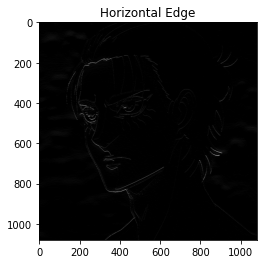

In [14]:
#Prewitt operator
#Complete the function

prewittx = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]]) # vertical kernel

prewitty = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])  # horizantal kernel

vertical_edge = cv2.filter2D(img_bw, -1, prewittx)   #filter2D(source of original image,desired depth,kernel)
horizontal_edge = cv2.filter2D(img_bw, -1, prewitty)

cv2.imshow('Original Image', img_bw)
cv2.imshow('Vertical Edges (Prewitt)', vertical_edge)
cv2.imshow('Horizontal Edges (Prewitt)', horizontal_edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Show Image: orignal, vertical, horizontal by prewitt
utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original image', ' Vertical edge by prewitt', 'horizontal edge by prewitt'])
utils.showImage([img_bw],['Original Image'])
utils.showImage([vertical_edge],['Vertical Edge'],scale=True)
utils.showImage([horizontal_edge],['Horizontal Edge'], scale= True)

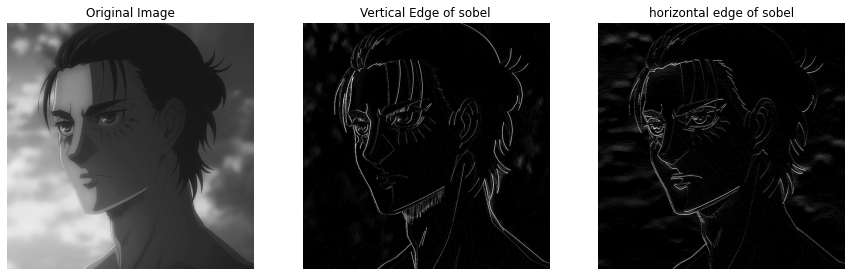

In [15]:
# Sobel operator

sobelx = np.array([[-1, 0, 1],
                   [-10, 0, 10],
                   [-1, 0, 1]])

sobely = np.array([[-1, -10, -1],
                   [0, 0, 0],
                   [1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original Image' , 'Vertical Edge of sobel', 'horizontal edge of sobel'])
# utils.showImage([vertical_edge], ['Vertical Edge'], 'Sobel Operator')
# utils.showImage([horizontal_edge], ['Vertical Edge'], 'Sobel Operator')

#Show Image: orignal, vertical, horizontal by Sobel operator

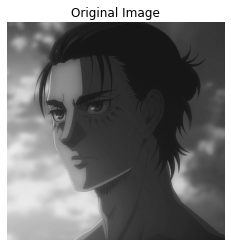

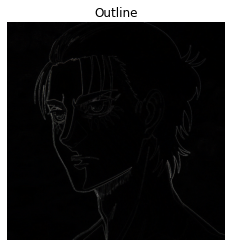

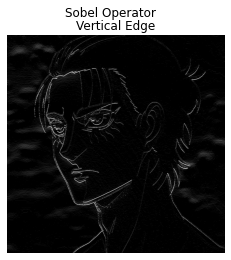

In [16]:
# Outline Kernel
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

outline = cv2.filter2D(img, -1, kernel)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw], ['Original Image'])
utils.showImage([outline], ['Outline'])
utils.showImage([horizontal_edge], ['Vertical Edge'], 'Sobel Operator')

## Demo example:  edge detection

In [17]:
import requests

from PIL import Image
from io import BytesIO


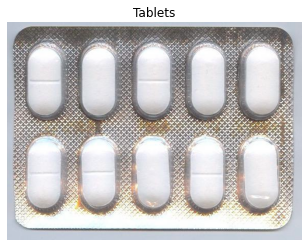

In [18]:
#Read an Image

# response = requests.get('https://i-stack.imgur.com/uk0kD.jpg')
# img = np.asarray(Image.open(BytesIO(response)))
img = cv2.imread('pack.jpg')  

img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        

utils.showImage([img], ['Tablets'])

## Problem statement
Defect detetction of the tablets in the pack

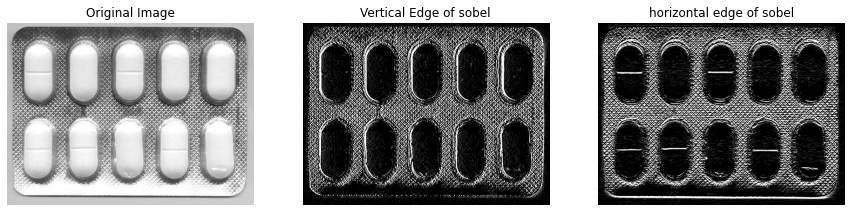

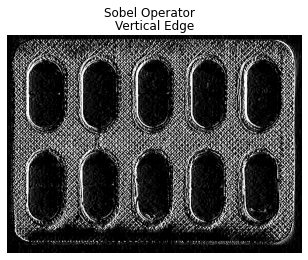

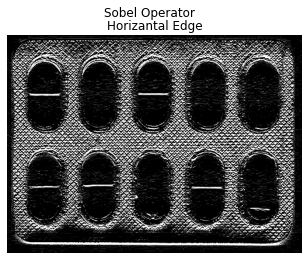

In [36]:
# Sobel operator

sobelx = np.array([[-1, 0, 1],
                   [-10, 0, 10],
                   [-1, 0, 1]])

sobely = np.array([[-1, -10, -1],
                   [0, 0, 0],
                   [1, 10, 1]])

vertical_edge = cv2.filter2D(img_bw, -1, sobelx)
horizontal_edge = cv2.filter2D(img_bw, -1, sobely)

utils.showImage([img_bw, vertical_edge, horizontal_edge], ['Original Image' , 'Vertical Edge of sobel', 'horizontal edge of sobel'])
utils.showImage([vertical_edge], ['Vertical Edge'], 'Sobel Operator')
utils.showImage([horizontal_edge], ['Horizantal Edge'], 'Sobel Operator')

#Show Image: orignal, vertical, horizontal by Sobel operator

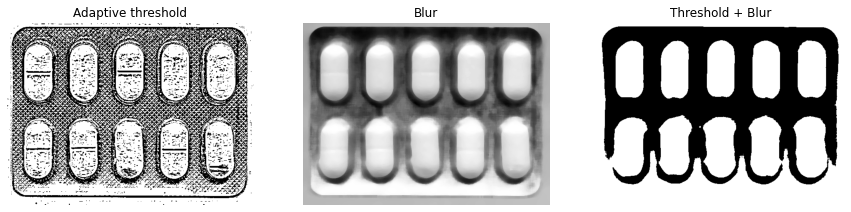

In [37]:
img_thr = cv2.adaptiveThreshold(img_bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
img_blur = cv2.medianBlur(img_bw, 11)

ret, img_blur_th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

utils.showImage([img_thr, img_blur, img_blur_th], ['Adaptive threshold' , 'Blur', 'Threshold + Blur'])

## TO DO

1. Calculate countours
- contour is boundary around something that has well defined edges so the machiine is able to calculate diffrence in gradient and form a recognizable shape through continuing change and draw a boundary around.
- Through contour detection, we can detect the border of objects. Many examples of contour detection include foreground extraction,image segmentation,detection and recognition
2. Creating bounding boxes around blobs detected

Check Tutorial of OPENCV

Expected result: defected tablets bound with a red rectangle, non defected --with green BB

In [8]:
# define countours

contours, _ = cv2.findContours(img_blur_th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Define criteria for defective tablets (example criteria: small area)
    area = cv2.contourArea(contour)
    if area < 500:  # Assuming defective if the area is less than 500
        color = (0, 0, 255)
    else:
        color = (0, 255, 0)  # Green for non-defective
    
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

utils.showImage([img], ['Defected Tablets Detection'])
# crop to single tablet


# and find vertica and horsontal tablet then do the bounding boxws





NameError: name 'img_blur_th' is not defined